In [1]:
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import cm

## Load data into a Pandas dataframe

In [7]:
cdklm_tuning_files = (
    ("laptop_cdklm_profiling.npz", "Laptop"),
    ("scripts/cdklm_all_cuda_git_versions_desktop_2018_10_11-16_39_52.npz", "Desktop"),
    ("supercomputer_fermi_cdklm_profiling.npz", "Met"),
    ("supercomputer_fermi_cdklm_profiling.npz", "Fermi")
)

ctcs_tuning_files =  (
    ("scripts/ctcs_all_cuda_git_versions_desktop_2018_10_11-17_12_47.npz", "Laptop"),
    ("scripts/ctcs_all_cuda_git_versions_desktop_2018_10_11-17_12_47.npz", "Desktop"),
    ("scripts/ctcs_all_cuda_git_versions_desktop_2018_10_11-17_12_47.npz", "Met"),
    ("scripts/ctcs_all_cuda_git_versions_desktop_2018_10_11-17_12_47.npz", "Fermi")
)

fbl_tuning_files = (
    ("scripts/fbl_all_cuda_git_versions_desktop_2018_10_11-17_13_43.npz", "Laptop"),
    ("scripts/fbl_all_cuda_git_versions_desktop_2018_10_11-17_13_43.npz", "Desktop"),
    ("scripts/fbl_all_cuda_git_versions_desktop_2018_10_11-17_13_43.npz", "Met"),
    ("scripts/fbl_all_cuda_git_versions_desktop_2018_10_11-17_13_43.npz", "Fermi")
)


def make_df(files):
    #Create column names
    columns = ["labels"]
    for _, label in files:
        columns = columns + ["megacells " + label]

    #Create index names:
    with np.load(files[0][0]) as data:
        index = data['versions']
        labels = data['labels']

    df = pd.DataFrame(columns=columns, index=index)
    df['labels'] = labels

    for filename, label in files:
        with np.load(filename) as data:
            versions = data['versions']
            assert np.all(versions == df.index)
            df["megacells " + label] = data['megacells']

    print(df)
    return df, versions 

## Plot results

In [8]:
def plot_results(files):
    df, versions = make_df(files)
    fig = plt.figure()

    fig, ax = plt.subplots(figsize=(12,8))

    num_bars = len(files)
    bar_width = 0.9 / num_bars
    bar_offset = 0.05

    x = np.arange(len(versions))
    architectures = list(zip(*files))[1]
    num_architectures = len(architectures)

    for i, label in enumerate(architectures):
        values = df['megacells ' + label]
        values = values / values[0] #Normalize
        ax.bar(x+2*bar_offset + (i - num_architectures/2)*bar_width, values, bar_width, label=label)

    plt.xticks(x, df['labels'], rotation='vertical')
    plt.grid()

    plt.legend()

                                                                            labels  \
a126bab97e690b7c642814e3c8b96f9879adf487  original (per arch optimized block size)   
5d817bb7cd2b369039117d19aae7d669a9a2e53a            Optimized shared memory use Hm   
2e5da01457874ad5087398da77b9102ee991fb94       Optimized shared memory use RHx/RHy   
fcd145c8c29f3d38a024685fdd0fc3cf9580366c             Optimized shared memory use Q   
74e957bb41e391a5c5fbb19c3cac393079272dd3             Optimized shared memory use F   
5aba525d1d64937c03e8d2b33bb7f6d80b97a81a             Optimized shared memory use G   
addb061fe1cfccebb6fab70f9826be3752162b0b            Optimized shared memory use Qy   
aab115045fd6d313940fa37be3149155ba4ead70                      Made variables const   
f6a911368b429df608eb5e1218c28bc14d6ffbe2         Updated blocksize experiment code   
339eb0c9a3bf04875507fab24d8924e24718a2eb                Changed default block size   
1319edf92c20b8d5fd9fc8c0e0ed58176f9cc2ba              

<Figure size 432x288 with 0 Axes>

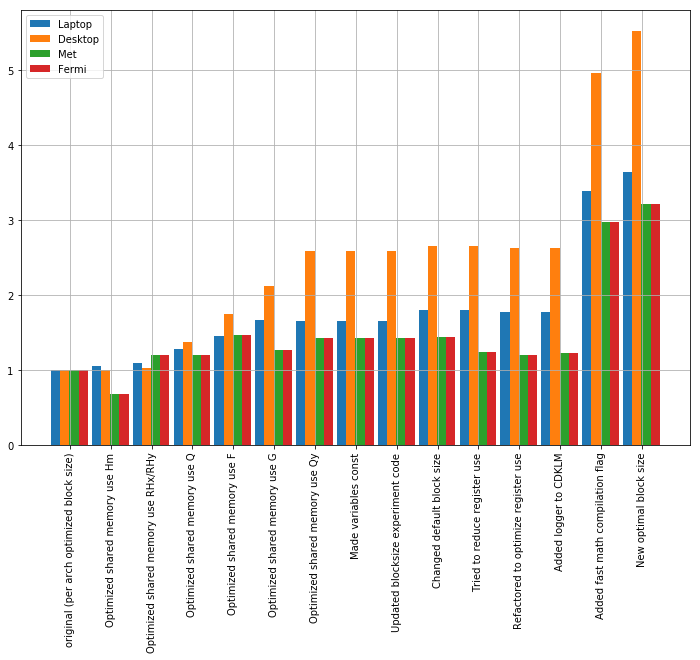

In [9]:
plot_results(cdklm_tuning_files)

                                                            labels  \
9507b86aa57bdcedccdf3840435b31b20005dc11      "original CTCS CUDA"   
06e92ae9da98e74e1a41e94d90081a349a3b66ad        "const everywhere"   
b0faacf64a4be91442095153b8cec7d1efff37a1         "maxrregcount=32"   
0aa5f2483a3c8ad75552fd2141f8cc3ea5d67f38            "pack wall_bc"   
08eaf4636238d0553cea7d307253ef44cc380106          "fast math flag"   
22d25b210baddd14f1ffb0bdba358995eb746b43        "multiple streams"   
2d90aae49a63f5904897d3417a8678f1a57d3e8d       "reduing BC blocks"   
1ff345b57211f828c2e9cc9f7a879a2a909b2f62   "removing maxrregcount"   
c39c8ba8701fdf708dadafd12cc76f809aeb8cb0     "optimized CTCS CUDA"   

                                          megacells Laptop  megacells Desktop  \
9507b86aa57bdcedccdf3840435b31b20005dc11        671.913974         671.913974   
06e92ae9da98e74e1a41e94d90081a349a3b66ad        702.773836         702.773836   
b0faacf64a4be91442095153b8cec7d1efff37a1        692.0390

<Figure size 432x288 with 0 Axes>

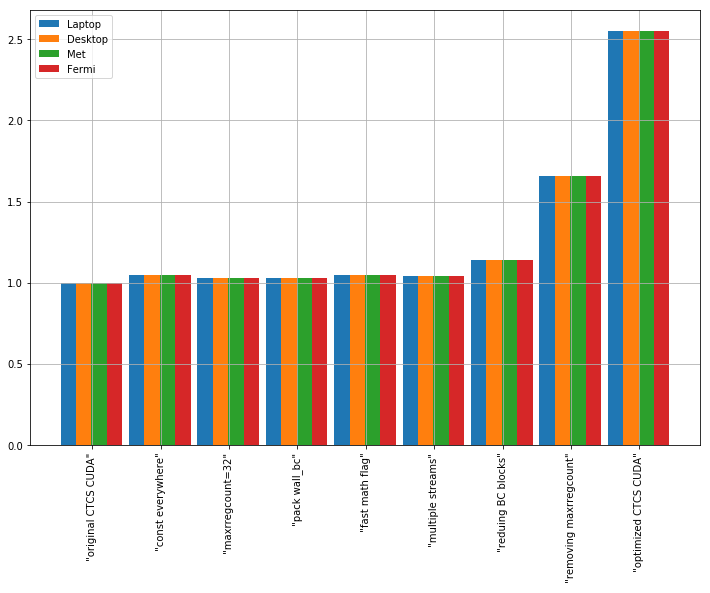

In [10]:
plot_results(ctcs_tuning_files)

                                                         labels  \
9507b86aa57bdcedccdf3840435b31b20005dc11    "Original FBL CUDA"   
22d25b210baddd14f1ffb0bdba358995eb746b43       "fast math flag"   
fa2dc111750a08760a27d2d47c2aaebc3aded911      "one kernel only"   
38ff9b268a84e3f4a0805c67041b336f396e9a31   "Optimized FBL CUDA"   

                                          megacells Laptop  megacells Desktop  \
9507b86aa57bdcedccdf3840435b31b20005dc11       1779.315978        1779.315978   
22d25b210baddd14f1ffb0bdba358995eb746b43       2031.901867        2031.901867   
fa2dc111750a08760a27d2d47c2aaebc3aded911       2307.622872        2307.622872   
38ff9b268a84e3f4a0805c67041b336f396e9a31       2721.609750        2721.609750   

                                          megacells Met  megacells Fermi  
9507b86aa57bdcedccdf3840435b31b20005dc11    1779.315978      1779.315978  
22d25b210baddd14f1ffb0bdba358995eb746b43    2031.901867      2031.901867  
fa2dc111750a08760a27d2d47c2aaebc3

<Figure size 432x288 with 0 Axes>

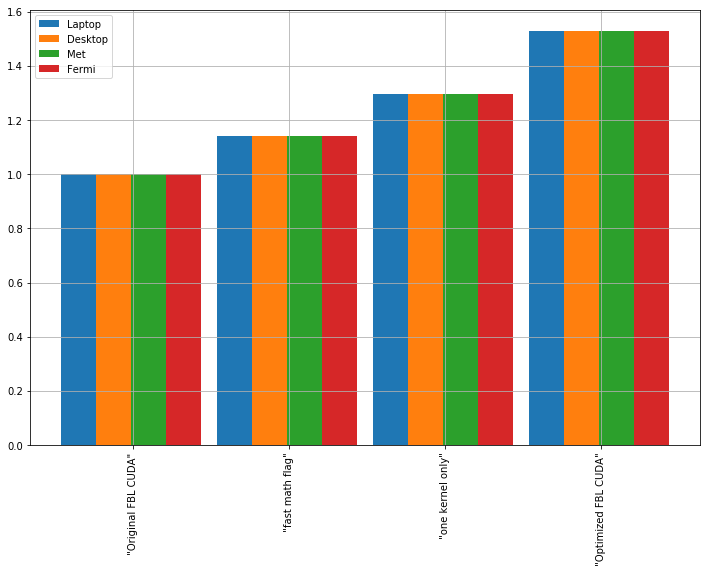

In [11]:
plot_results(fbl_tuning_files)

In [12]:
with np.load(outfile_desktop) as data:
    for i in data:
        print (i)
    print (data['versions'])
    print (versions)

NameError: name 'outfile_desktop' is not defined